___

<a href='https://sites.google.com/fat.uerj.br/livia'> <img src='../../figures/capa2.png' /></a>
___

## Introduction

Matplotlib é a biblioteca "grandfather" de visualização de dados com Python. Foi criado por John Hunter. Ele o criou para tentar replicar os recursos de plot do MatLab (outra linguagem de programação) em Python. Portanto, se você estiver familiarizado com o Matlab, o matplotlib parecerá natural para você.

É uma excelente biblioteca de gráficos 2D e 3D para gerar figuras científicas.

Alguns dos principais profissionais do Matplotlib são:

* Geralmente fácil de começar para plots simples
* Suporte para rótulos e textos personalizados
* Ótimo controle de cada elemento em uma figura
* Saída de alta qualidade em vários formatos
* Muito personalizável em geral

Matplotlib permite que você crie figuras reproduzíveis programaticamente. Vamos aprender a usar! Antes de continuar esta seção, eu recomendo a explorar a página oficial do Matplotlib: http://matplotlib.org/

## Instalação

Você precisará instalar o matplotlib primeiro com:

     conda install matplotlib
ou
     pip install matplotlib
    
## Importando

Importar o modulo `matplotlib.pyplot` module com apelido `plt` (a forma mais comum na comunidade):

In [1]:
import matplotlib.pyplot as plt

Você também precisará usar esta linha para ver os gráficos no notebook:

In [2]:
%matplotlib inline

# ou 
# %matplotlib notebook

Essa linha é apenas para notebooks jupyter, se você estiver usando outro editor, você usará: **plt.show()** no final de todos os seus comandos de plotagem para que a figura apareça em outra janela.

# Exemplos Basicos

Vamos ver um exemplo muito simples usando dois arrays do numpy:

### Exemplo

Você também pode usar listas, mas na paratica a gente trabalha mais com os arrays do numpy ou colunas pandas (que essencialmente também se comportam como arrays).

**Os dados que queremos plotar:**

In [7]:
import numpy as np
x = np.linspace(0, 5, 11)
y = x ** 2

In [8]:
x

array([ 0. ,  0.5,  1. ,  1.5,  2. ,  2.5,  3. ,  3.5,  4. ,  4.5,  5. ])

In [10]:
y

array([  0.  ,   0.25,   1.  ,   2.25,   4.  ,   6.25,   9.  ,  12.25,
        16.  ,  20.25,  25.  ])

## Comandos básicos do Matplotlib

Podemos criar um gráfico de linha muito simples usando o seguinte (recomendo a pausar e usar Shift+Tab, no jupyter notebook, para verificar a documentação das funções que estamos usando).

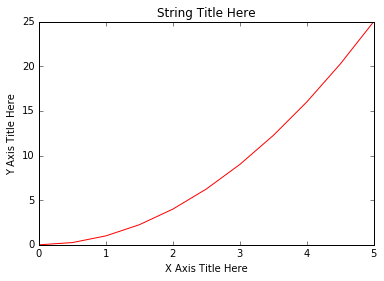

In [13]:
plt.plot(x, y, 'r') # 'r' is the color red
plt.xlabel('X Axis Title Here')
plt.ylabel('Y Axis Title Here')
plt.title('String Title Here')
plt.show()

## Creating Multiplots on Same Canvas

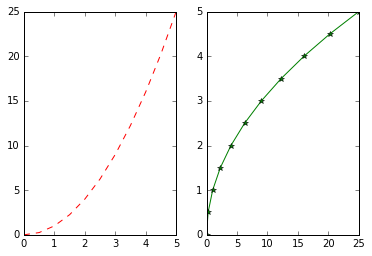

In [14]:
# plt.subplot(nrows, ncols, plot_number)
plt.subplot(1,2,1)
plt.plot(x, y, 'r--') # Vamos ver mais sobre as cores
plt.subplot(1,2,2)
plt.plot(y, x, 'g*-');

___
# Abordagem Orientado ao Objeto (Object Oriented Method) do Matplotlib
Agora que vimos o básico, vamos detalhar tudo com uma introdução mais formal da API Orientada ao Objeto do Matplotlib. Isso significa que vamos instanciar objetos de figura e então chamar métodos ou atributos desse objeto.

A idéia principal em usar o método mais formal, Orientado ao Objeto, é criar objetos de figura e então apenas chamar métodos ou atributos desse objeto. Essa abordagem é melhor ao lidar com uma tela que possui vários gráficos.

Para começar, criamos uma `instância` de figura. Então podemos adicionar eixos a essa figura:

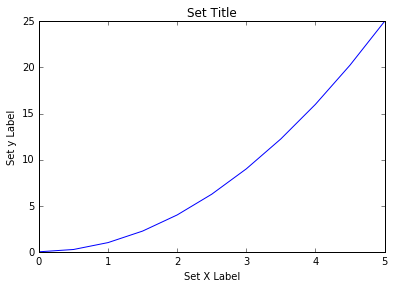

In [15]:
# Criar Figura (Um Canvas vazio)
fig = plt.figure()

# Adicionar um conjuntos de eixos a figura
axes = fig.add_axes([0.1, 0.1, 0.8, 0.8]) # left, bottom, width, height (range 0 to 1)

# Plotar no conjunto dos eixos
axes.plot(x, y, 'b')
axes.set_xlabel('Set X Label') # Presta atenção na palavra "set_" no inicio de metodo
axes.set_ylabel('Set y Label')
axes.set_title('Set Title')

O código é um pouco mais complicado, mas a vantagem é que agora temos controle total de onde os eixos de plotagem são colocados e podemos adicionar facilmente mais de um eixo à figura:

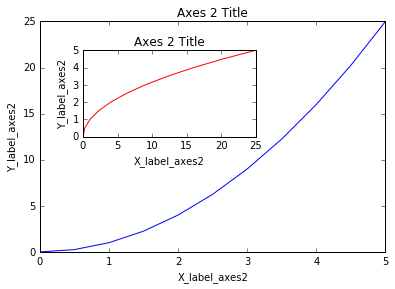

In [16]:
# Criar um canvas vazio
fig = plt.figure()

axes1 = fig.add_axes([0.1, 0.1, 0.8, 0.8]) # eixo principal
axes2 = fig.add_axes([0.2, 0.5, 0.4, 0.3]) # eixo interno

# Eixo 1 é o maior
axes1.plot(x, y, 'b')
axes1.set_xlabel('X_label_axes2')
axes1.set_ylabel('Y_label_axes2')
axes1.set_title('Axes 2 Title')

# Inserindo o eixo 2
axes2.plot(y, x, 'r')
axes2.set_xlabel('X_label_axes2')
axes2.set_ylabel('Y_label_axes2')
axes2.set_title('Axes 2 Title');

## subplots()

O objeto plt.subplots() atuará como um gerenciador de eixos mais automático.

Um exemplo simples:

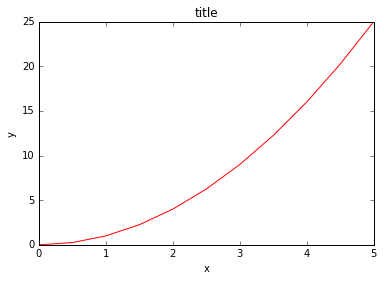

In [18]:
# Use similar to plt.figure() except use tuple unpacking to grab fig and axes
# Semelhante a plt.figure(), exceto use a Tuple Unpacking para pegar fig e eixos
fig, axes = plt.subplots()

# Agora use o objeto axes para adicionar coisas para plotar
axes.plot(x, y, 'r')
axes.set_xlabel('x')
axes.set_ylabel('y')
axes.set_title('title');

Então você pode especificar o número de linhas e colunas ao criar o objeto `subplots()`:

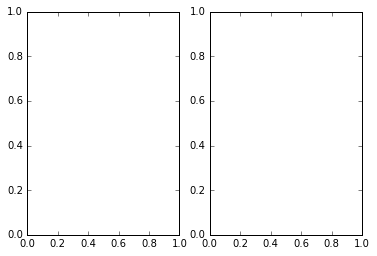

In [24]:
# Um canvas vazio com uma linha e duas colunas
fig, axes = plt.subplots(nrows=1, ncols=2)

In [25]:
# Axes é um array dos eixos para plotar
 
axes

array([<matplotlib.axes._subplots.AxesSubplot object at 0x111f0f8d0>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x1121f5588>], dtype=object)

Podemos iterar através deste array:

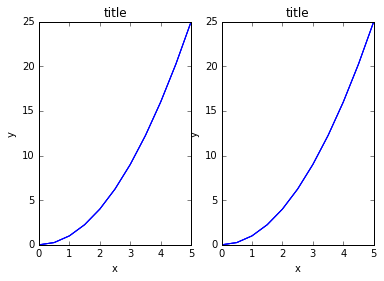

In [28]:
for ax in axes:
    ax.plot(x, y, 'b')
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_title('title')

# Exibir o objeto de figura    
fig

Um problema comum com o matplolib é a sobreposição de subplots ou figuras. Podemos usar o método `fig.tight_layout()` ou `plt.tight_layout()`, que ajusta automaticamente as posições dos eixos na figura para que não haja conteúdo sobreposto:

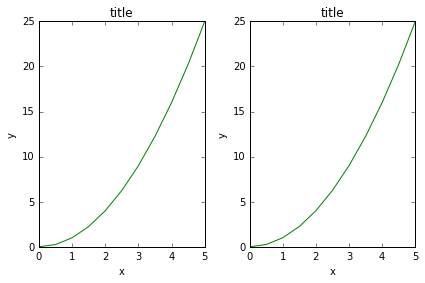

In [32]:
fig, axes = plt.subplots(nrows=1, ncols=2)

for ax in axes:
    ax.plot(x, y, 'g')
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_title('title')

fig    
plt.tight_layout()

### Figure size, aspect ratio and DPI

Matplotlib permite que a proporção, o DPI e o tamanho da figura sejam especificados quando o objeto Figura é criado. Você pode usar os argumentos de palavras-chave `figsize` e `dpi`.
* `figsize` é uma tupla da largura e altura da figura em polegadas
* `dpi` é o ponto por polegada (pixel por polegada).

Por exemplo:

In [33]:
fig = plt.figure(figsize=(8,4), dpi=100)

Os mesmos argumentos também podem ser passados para gerenciadores de layout, como a função `subplots`:

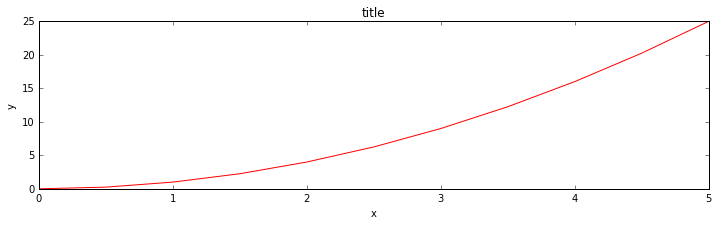

In [34]:
fig, axes = plt.subplots(figsize=(12,3))

axes.plot(x, y, 'r')
axes.set_xlabel('x')
axes.set_ylabel('y')
axes.set_title('title');

## Salvando figuras
O Matplotlib pode gerar output de alta qualidade em vários formatos, incluindo PNG, JPG, EPS, SVG, PGF e PDF.

Para salvar uma figura em um arquivo podemos usar o método `savefig` na classe `Figure`:

In [68]:
fig.savefig("filename.png")

Aqui também podemos opcionalmente especificar o DPI e escolher entre diferentes formatos de saída:

In [69]:
fig.savefig("filename.png", dpi=200)

____
## Legendas, rótulos e títulos (Legends, labels and titles)

Agora que abordamos o básico de como criar um canvas e adicionar instâncias de eixos à canvas, vamos ver como personalizar uma figura com títulos, rótulos de eixo e legendas.

Um título pode ser adicionado a cada instância de eixo em uma figura. Para definir o título, use o método `set_title` na instância de eixos:

In [41]:
ax.set_title("title");

**Rótulos de eixo**

Da mesma forma, com os métodos `set_xlabel` e `set_ylabel`, podemos definir os rótulos dos eixos X e Y:

In [42]:
ax.set_xlabel("x")
ax.set_ylabel("y");

### Legendas

Você pode usar o argumento de palavra-chave `label="leganda_desejada"` quando gráficos ou outros objetos são adicionados à figura e, em seguida, usar o método `legend` sem argumentos para adicionar a legenda à figura:

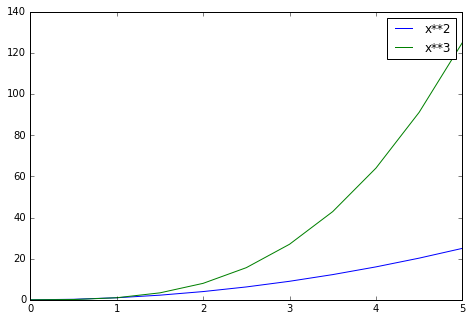

In [48]:
fig = plt.figure()

ax = fig.add_axes([0,0,1,1])

ax.plot(x, x**2, label="x**2")
ax.plot(x, x**3, label="x**3")
ax.legend()

Observe como as legendas se sobrepõem o grafico no plot!

A função `legend` recebe um argumento de palavra-chave opcional `loc` que pode ser usado para especificar onde na figura a legenda deve ser desenhada. Os valores permitidos de `loc` são códigos numéricos para os vários locais em que a legenda pode ser colocada. Consulte a [página de documentação](http://matplotlib.org/users/legend_guide.html#legend-location) para obter detalhes. Alguns dos valores `loc` mais comuns são:

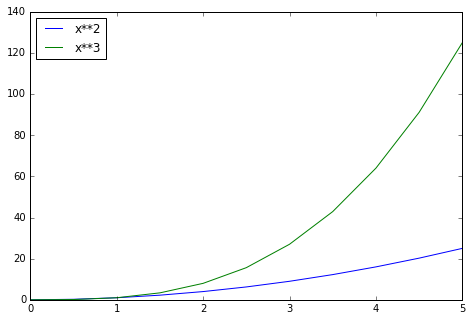

In [52]:
# Muitas opções...

ax.legend(loc=1) # upper right corner
ax.legend(loc=2) # upper left corner
ax.legend(loc=3) # lower left corner
ax.legend(loc=4) # lower right corner

# .. Existe muito mais opções

# A escolha mais comum
ax.legend(loc=0) # Deixar o matplotlib escolher o melhor lugar
fig

## Configurando cores, larguras de linha, tipos de linha (colors, linewidths, linetypes)

O Matplotlib oferece *muitas* opções para personalizar cores, larguras de linha e tipos de linha.

Existe a sintaxe básica do MATLAB (que é recomendavel evitar usar por mais clareza):

### Cores com sintaxe do Matlab

Com matplotlib, podemos definir as cores das linhas e outros elementos gráficos de várias maneiras. Em primeiro lugar, podemos usar a sintaxe do tipo MATLAB onde `'b'` significa azul (blue), `'g'` significa verde (green), etc. A API MATLAB para selecionar estilos de linha também é suportada: onde, por exemplo, 'b.-' significa uma linha azul com pontos:

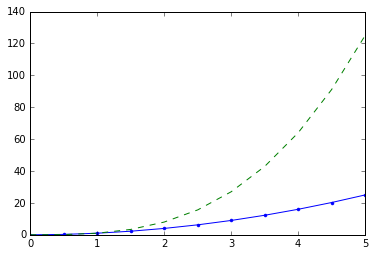

In [54]:
# MATLAB style line color and style 
fig, ax = plt.subplots()
ax.plot(x, x**2, 'b.-') # blue line with dots
ax.plot(x, x**3, 'g--') # green dashed line

### Cores com `color= parameter`

Também podemos definir cores por seus nomes ou códigos hexadecimais RGB e, opcionalmente, fornecer um valor alfa usando os argumentos de palavras-chave `color` e `alpha`. Alfa indica opacidade.

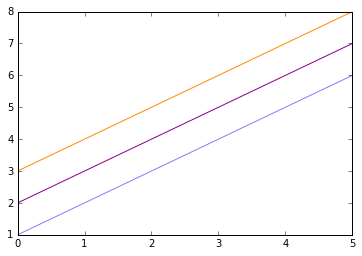

In [56]:
fig, ax = plt.subplots()

ax.plot(x, x+1, color="blue", alpha=0.5) # half-transparant
ax.plot(x, x+2, color="#8B008B")        # RGB hex code
ax.plot(x, x+3, color="#FF8C00")        # RGB hex code 

### Estilos de linha e marcador (Line and marker styles)

Para alterar a largura da linha, podemos usar o argumento de palavra-chave `linewidth` ou `lw`. O estilo de linha pode ser selecionado usando os argumentos de palavra-chave `linestyle` ou `ls`:

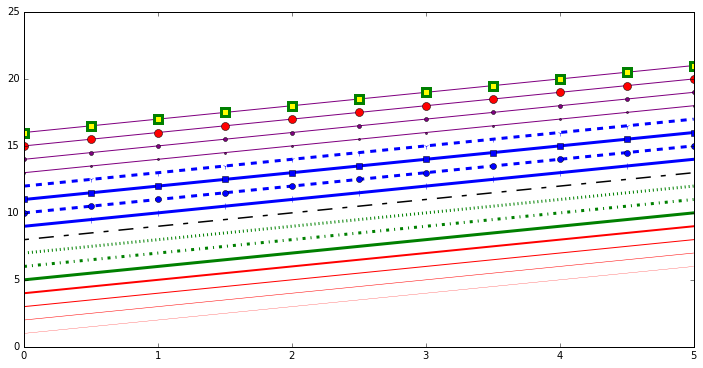

In [57]:
fig, ax = plt.subplots(figsize=(12,6))

ax.plot(x, x+1, color="red", linewidth=0.25)
ax.plot(x, x+2, color="red", linewidth=0.50)
ax.plot(x, x+3, color="red", linewidth=1.00)
ax.plot(x, x+4, color="red", linewidth=2.00)

# possible linestype options ‘-‘, ‘–’, ‘-.’, ‘:’, ‘steps’
ax.plot(x, x+5, color="green", lw=3, linestyle='-')
ax.plot(x, x+6, color="green", lw=3, ls='-.')
ax.plot(x, x+7, color="green", lw=3, ls=':')

# custom dash
line, = ax.plot(x, x+8, color="black", lw=1.50)
line.set_dashes([5, 10, 15, 10]) # format: line length, space length, ...

# possible marker symbols: marker = '+', 'o', '*', 's', ',', '.', '1', '2', '3', '4', ...
ax.plot(x, x+ 9, color="blue", lw=3, ls='-', marker='+')
ax.plot(x, x+10, color="blue", lw=3, ls='--', marker='o')
ax.plot(x, x+11, color="blue", lw=3, ls='-', marker='s')
ax.plot(x, x+12, color="blue", lw=3, ls='--', marker='1')

# marker size and color
ax.plot(x, x+13, color="purple", lw=1, ls='-', marker='o', markersize=2)
ax.plot(x, x+14, color="purple", lw=1, ls='-', marker='o', markersize=4)
ax.plot(x, x+15, color="purple", lw=1, ls='-', marker='o', markersize=8, markerfacecolor="red")
ax.plot(x, x+16, color="purple", lw=1, ls='-', marker='s', markersize=8, 
        markerfacecolor="yellow", markeredgewidth=3, markeredgecolor="green");

### Controle sobre a aparência do eixo

Nesta seção, veremos como controlar as propriedades de dimensionamento de eixos em uma figura do matplotlib.

## Plot range

Podemos configurar os intervalos dos eixos usando os métodos `set_ylim` e `set_xlim` no objeto axis, ou `axis('tight')` para obter automaticamente intervalos de eixos "ajustados":

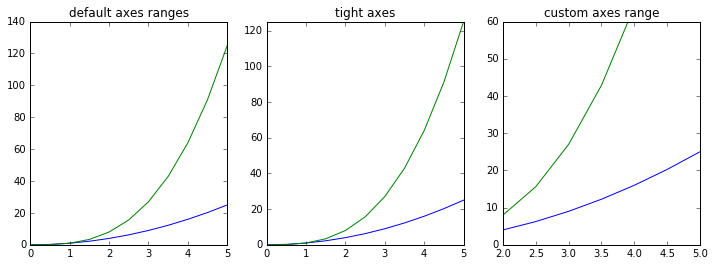

In [58]:
fig, axes = plt.subplots(1, 3, figsize=(12, 4))

axes[0].plot(x, x**2, x, x**3)
axes[0].set_title("default axes ranges")

axes[1].plot(x, x**2, x, x**3)
axes[1].axis('tight')
axes[1].set_title("tight axes")

axes[2].plot(x, x**2, x, x**3)
axes[2].set_ylim([0, 60])
axes[2].set_xlim([2, 5])
axes[2].set_title("custom axes range");

# Tipos de plots especiais

Existem muitos gráficos especializados que podemos criar, como barplots, histogramas, gráficos de dispersão (scatter plots), e muito mais. Na verdade, criaremos a maioria desses tipos de gráficos usando o seaborn, uma biblioteca de gráficos estatísticos para Python. Mas aqui estão alguns exemplos desse tipo de parcelas:

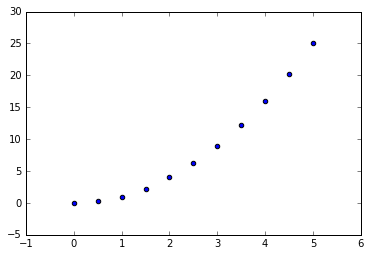

In [60]:
plt.scatter(x,y)

(array([ 14.,  11.,   9.,  12.,   6.,   7.,  13.,  13.,   6.,   9.]),
 array([  28. ,  123.5,  219. ,  314.5,  410. ,  505.5,  601. ,  696.5,
         792. ,  887.5,  983. ]),
 <a list of 10 Patch objects>)

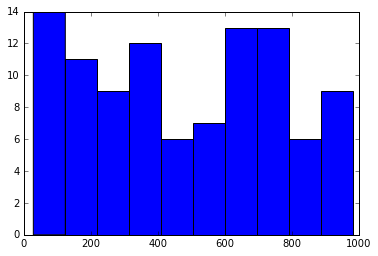

In [65]:
from random import sample
data = sample(range(1, 1000), 100)
plt.hist(data)

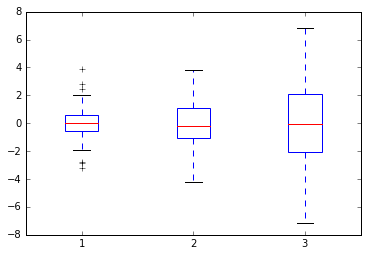

In [69]:
data = [np.random.normal(0, std, 100) for std in range(1, 4)]

# rectangular box plot
plt.boxplot(data,vert=True,patch_artist=True);   

## Para maiores informações

* http://www.matplotlib.org - The project web page for matplotlib.
* https://github.com/matplotlib/matplotlib - The source code for matplotlib.
* http://matplotlib.org/gallery.html - A large gallery showcaseing various types of plots matplotlib can create. Highly recommended! 
* http://www.loria.fr/~rougier/teaching/matplotlib - A good matplotlib tutorial.
* http://scipy-lectures.github.io/matplotlib/matplotlib.html - Another good matplotlib reference.
